In [13]:
# Short tunable toy model for Shapley values.

import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from scipy.stats import skew, kurtosis, norm
from sklearn.cluster import DBSCAN, HDBSCAN
from sklearn.preprocessing import quantile_transform
import shap
import hdbscan
%matplotlib inline

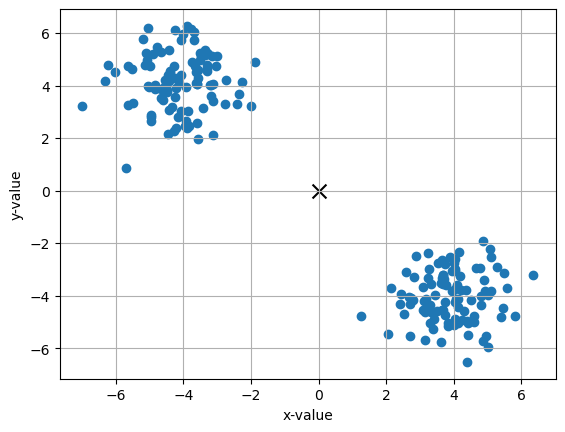

In [83]:
x = np.concatenate((np.random.normal(-4, 1, 100), np.random.normal(4, 1, 100)))
y = np.concatenate((np.random.normal(4, 1, 100), np.random.normal(-4, 1, 100)))
#y = np.random.uniform(-5, 5, 200)
z = np.random.normal(0, 1, 200)
plt.scatter(x, y)
plt.scatter([0], [0], marker='x', color='k', s=100)
plt.grid()
plt.xlabel('x-value')
plt.ylabel('y-value')
plt.show()

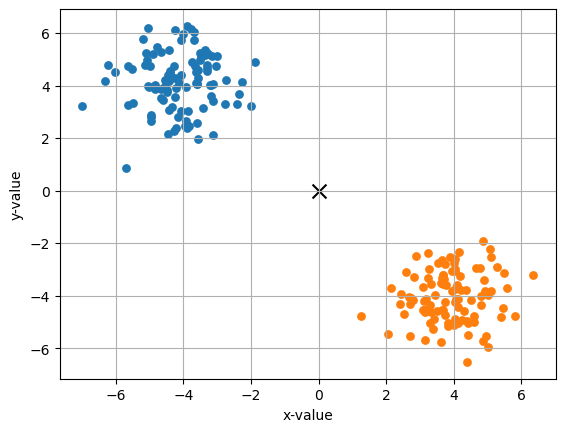

In [84]:
data = np.transpose([x, y, z])
hdb = hdbscan.HDBSCAN(min_cluster_size=5, 
                      min_samples=5, 
                      cluster_selection_epsilon=0, 
                      prediction_data=True
                      ).fit(data)
labels_list = hdb.labels_
labels = np.unique(labels_list)

for l in labels:
    idxs = np.where(labels_list == l)[0]
    if l == -1.:
        plt.scatter(x[idxs], y[idxs], color='0.8', s=10, linewidths=0, label=f'n={len(idxs)}')
        print(len(idxs))
    else:
        plt.scatter(x[idxs], y[idxs], s=40, linewidths=0, label=f'n={len(idxs)}')
plt.scatter([0], [0], marker='x', color='k', s=100)

plt.grid()
plt.xlabel('x-value')
plt.ylabel('y-value')
plt.show()

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:10<00:00, 19.20it/s]


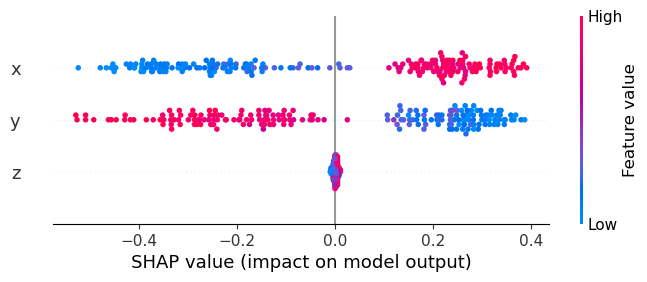

In [86]:
def hdbscan_predict(X):
    return hdbscan.approximate_predict(hdb,X)[0]

explainer = shap.KernelExplainer(model=hdbscan_predict, data=data, feature_names=['x', 'y', 'z'])

x2 = np.concatenate((np.random.normal(-4, 1, 100), np.random.normal(4, 1, 100)))
y2 = np.concatenate((np.random.normal(4, 1, 100), np.random.normal(-4, 1, 100)))
#y2 = np.random.uniform(-5, 5, 200)
z2 = np.random.uniform(-1, 1, 200)
data2 = np.transpose([x2, y2, z2])

shap.plots.beeswarm(explainer(data2), max_display=20, order=np.arange(3), show=True)